In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ratings.csv')
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')

In [4]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [5]:
x=df.groupby('genre')['rating'].mean().sort_values(ascending=False)
x.head(20)


genre
Adventure, Drama, Fantasy, Historical, Slice of Life                           10.000000
Adventure, Shoujo                                                              10.000000
Action, Super Power                                                            10.000000
Historical, Magic                                                              10.000000
Action, Cars, Comedy, School, Seinen                                           10.000000
Action, Comedy, Magic, Supernatural                                            10.000000
Action, Adventure, Demons, Fantasy, Game, Kids, Magic, Sci-Fi, Supernatural    10.000000
Comedy, Dementia, Military                                                     10.000000
Comedy, Music, Shoujo                                                          10.000000
Action, Adventure, Comedy, Martial Arts, Romance, Sports                       10.000000
Comedy, Samurai                                                                10.000000
Action, Music, 

In [6]:
y=df.groupby('name')['rating'].mean().sort_values(ascending=False)
y.head(20)

name
Shin Megami Tensei Devil Children                      10.0
Mahou no Tenshi Creamy Mami: Long Goodbye              10.0
Sougen no Shoujo Laura                                 10.0
Hello Kitty no Yappari Mama ga Suki                    10.0
Hello Kitty no Tomatta Big Ben                         10.0
Shin Megami Tensei Devil Children: Light &amp; Dark    10.0
Namakura Gatana                                        10.0
Sasuga no Sarutobi                                     10.0
Card Wang: Mix Master                                  10.0
Hello Kitty no Mahou no Ringo                          10.0
Fuusen Shoujo Temple-chan                              10.0
Oyaji no, Imo no Kamisama.                             10.0
Denshinbashira no Okaasan                              10.0
Ketsuekigata-kun! 4                                    10.0
Mahou no Tenshi Creamy Mami: Curtain Call              10.0
Mahou no Tenshi Creamy Mami: Lovely Serenade           10.0
Kinpatsu no Jeanie                 

In [7]:
z=df.groupby('name')['rating'].count().sort_values(ascending=False)
z.head(10)

name
Death Note                            5435
Shingeki no Kyojin                    4337
Sword Art Online                      4259
Code Geass: Hangyaku no Lelouch       3839
Elfen Lied                            3751
Naruto                                3606
Fullmetal Alchemist                   3536
Code Geass: Hangyaku no Lelouch R2    3444
Angel Beats!                          3420
Fullmetal Alchemist: Brotherhood      3267
Name: rating, dtype: int64

The best rated movies are not the ones which have maximum number user ratings. So presumably the cause is rare movies have been rated the best by only a certain group of users who prefer those not by popularity but by their own choice.

In [8]:
#df.set_index('name')

In [9]:
df.loc[df['name']=='Death Note']

,user_id,anime_id,rating,name,genre,type,episodes,members
164075,3,1535,10,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
164076,4,1535,-1,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
164077,5,1535,4,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
164078,6,1535,-1,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
164079,7,1535,9,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
...,...,...,...,...,...,...,...,...
169505,10087,1535,8,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
169506,10088,1535,9,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
169507,10089,1535,10,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917
169508,10092,1535,9,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917


In [10]:
df.loc[df['name']=='Shingeki no Kyojin']

,user_id,anime_id,rating,name,genre,type,episodes,members
101747,1,16498,-1,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
101748,3,16498,10,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
101749,4,16498,-1,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
101750,10,16498,-1,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
101751,11,16498,9,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
...,...,...,...,...,...,...,...,...
106079,10088,16498,9,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
106080,10089,16498,10,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
106081,10090,16498,8,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229
106082,10092,16498,10,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229


In [11]:
df.loc[df['name']=='Sword Art Online']

,user_id,anime_id,rating,name,genre,type,episodes,members
80578,1,11757,10,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
80579,3,11757,9,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
80580,4,11757,-1,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
80581,5,11757,1,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
80582,7,11757,8,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
...,...,...,...,...,...,...,...,...
84832,10088,11757,9,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
84833,10090,11757,8,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
84834,10091,11757,8,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100
84835,10092,11757,8,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100


Analysis into this shows that except for the movie Death Note,most of top movies also fall into the category of top genre.

In [12]:
g=pd.DataFrame(data=anime[['genre','name']])
g.set_index('name',inplace=True)
r=pd.DataFrame(df.groupby('name')['rating'].mean())
r['no. of ratings']=pd.DataFrame(df.groupby('name')['rating'].count())


(0, 8000)

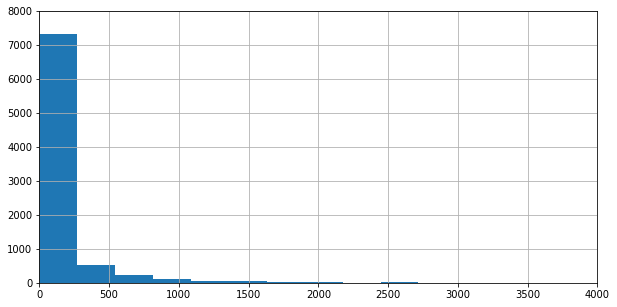

In [13]:
plt.figure(figsize=(10,5))
r['no. of ratings'].hist(bins=20)
plt.xlim(0,4000)
plt.ylim(0,8000)

(0, 3000)

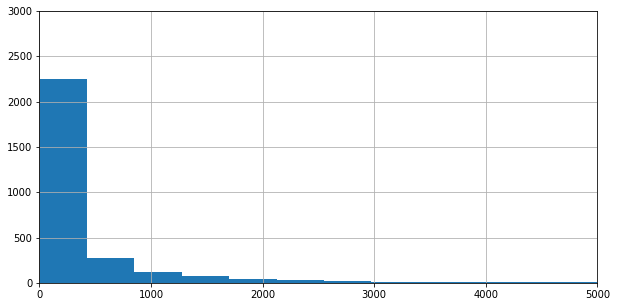

In [14]:
rg=pd.DataFrame(df.groupby('genre')['rating'].mean())
rg['no. of ratings']=pd.DataFrame(df.groupby('genre')['rating'].count())
plt.figure(figsize=(10,5))
rg['no. of ratings'].hist(bins=20)
plt.xlim(0,5000)
plt.ylim(0,3000)


From the histogram of the number of ratings considering aggregation levels of genre and name of movies, we conclude that the maximum number of ratings fall in the bin size of 0-1000 for both 'name' and 'genre'

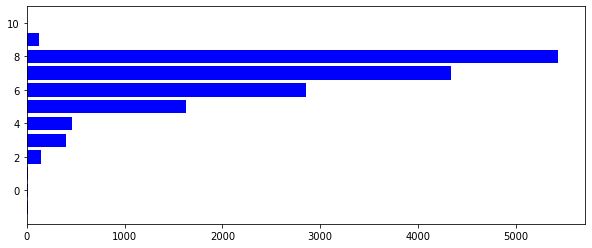

In [19]:
plt.figure(figsize =(10, 4))
ax=plt.barh(r['rating'].round(),r['no. of ratings'],color='b')
plt.show()


This plot shows the rounded up ratings with number of movies.

In [15]:
r.head()

,rating,no. of ratings
name,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,6.074380,121
&quot;Bungaku Shoujo&quot; Memoire,6.319588,97
&quot;Bungaku Shoujo&quot; Movie,6.449438,178
.hack//G.U. Returner,4.953271,107
.hack//G.U. Trilogy,5.650888,169


In [16]:
#plt.figure(figsize =(10, 4))
#ax=plt.subplot()
#ax.bar(r.head(10).index,r['no. of ratings'].head(20))
#ax.set_xticklabels(r.index,rotation=40,fontsize='12',horizontalalignment="right")
#ax.set_title("Total Number of reviews for each movie")
#plt.show()

In [17]:

def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
def get_recommendation(name):
    anime_genre = g.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    animemat = df[df['name'].isin(cols)].pivot_table(index='user_id',columns='name',values='rating')
       
    #create correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(r['no. of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['no. of ratings']>500].sort_values(['correlation','no. of ratings'],ascending=[False,False])
    
    return corr_anime.head(10)
get_recommendation('Mushishi')

C:\Users\Shramana Batabyal\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Shramana Batabyal\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,no. of ratings
name,,
Mushishi,1.000000,978
Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,0.855191,553
Love Live! School Idol Project,0.846820,585
Witch Craft Works,0.840659,561
Ghost in the Shell: Stand Alone Complex 2nd GIG,0.836252,595
Himouto! Umaru-chan,0.833419,524
Seirei Tsukai no Blade Dance,0.822657,555
Nanatsu no Taizai,0.819282,1147
Noragami Aragoto,0.816419,976
